# Smoothing of, and Parameter Estimation from, Noisy Biophysical Recordings

## I. Generating data

In [1]:
from generate_data import generate_observations, simulate_hh, plot_observations

Defining the model/simulation parameters

In [8]:
T = 4000
dt = 0.01
I = 10
sigma_dyn = 0.1
sigma_obs = 2
Ds = 5
traj_init = [-65.0, 0.05, 0.6, 0.32]

Simulating data according to Hodgkin–Huxley model

In [9]:
traj = simulate_hh(T=T, dt=dt, I=I, noise_std=sigma_dyn, traj_init=traj_init)  # (V, m, h, n)
V_true = traj[:, 0]

V_obs = generate_observations(V=V_true, sigma_obs=sigma_obs, Ds=Ds)

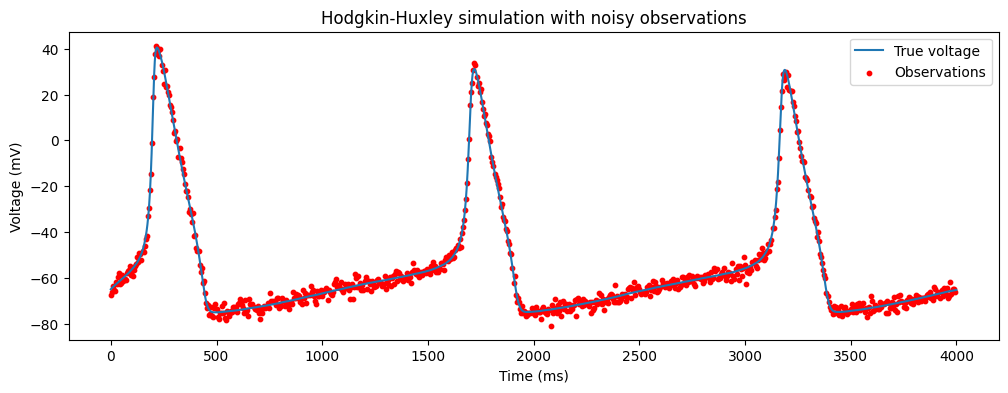

In [10]:
plot_observations(V_obs, V_true)

## Particle filter


In [11]:
from particle_filter import particle_filter, plot_signal

Defining parameters

In [12]:
N_particles = 200

In [13]:
V_filt, particles, weights = particle_filter(y = V_obs, N= N_particles, dt = dt, I = I, sigma_dyn = sigma_dyn, sigma_obs = sigma_obs, save_particles = True, particle_init=traj_init )

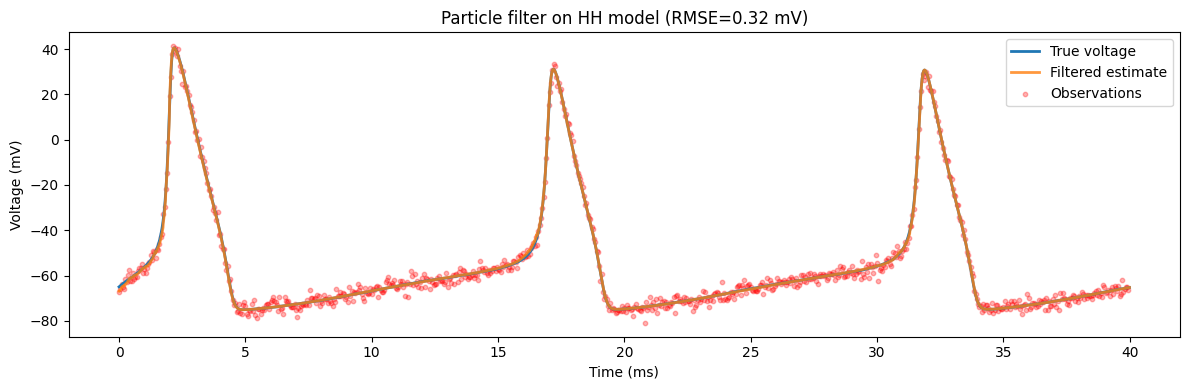

In [14]:
plot_signal(V_true, V_obs, V_filt, dt)

## Smoothing

In [15]:
from smoothing import backward_smoothing_logdomain, smooth_expectation, plot_smoothing_results

In [16]:
smoothed_particles, smoothed_weights = backward_smoothing_logdomain(
    particles=particles, weights=weights, dt=dt, I=I, sigma_dyn=sigma_dyn
)

expectations = smooth_expectation(smoothed_particles, smoothed_weights)
V_smooth = expectations[:, 0]


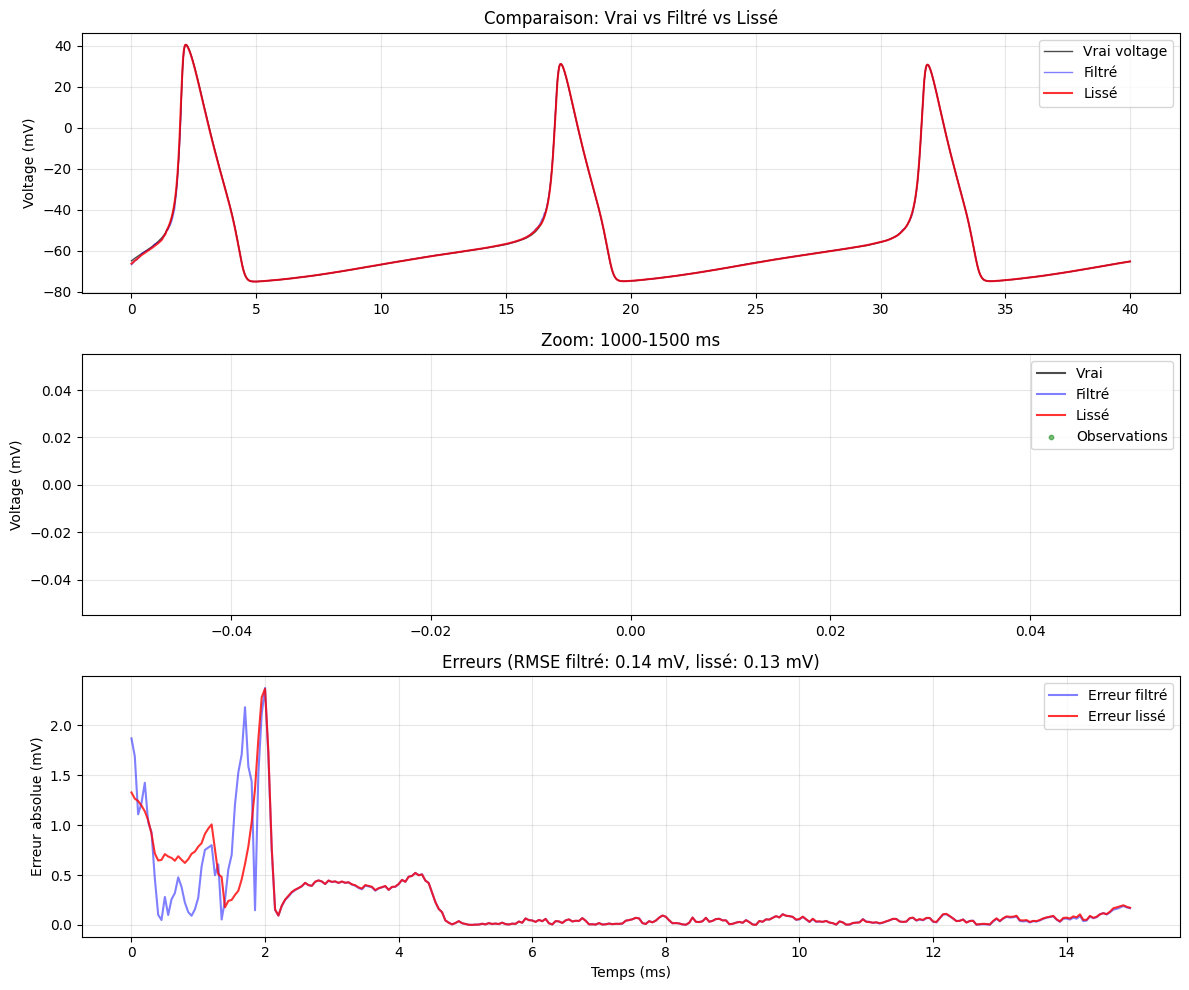

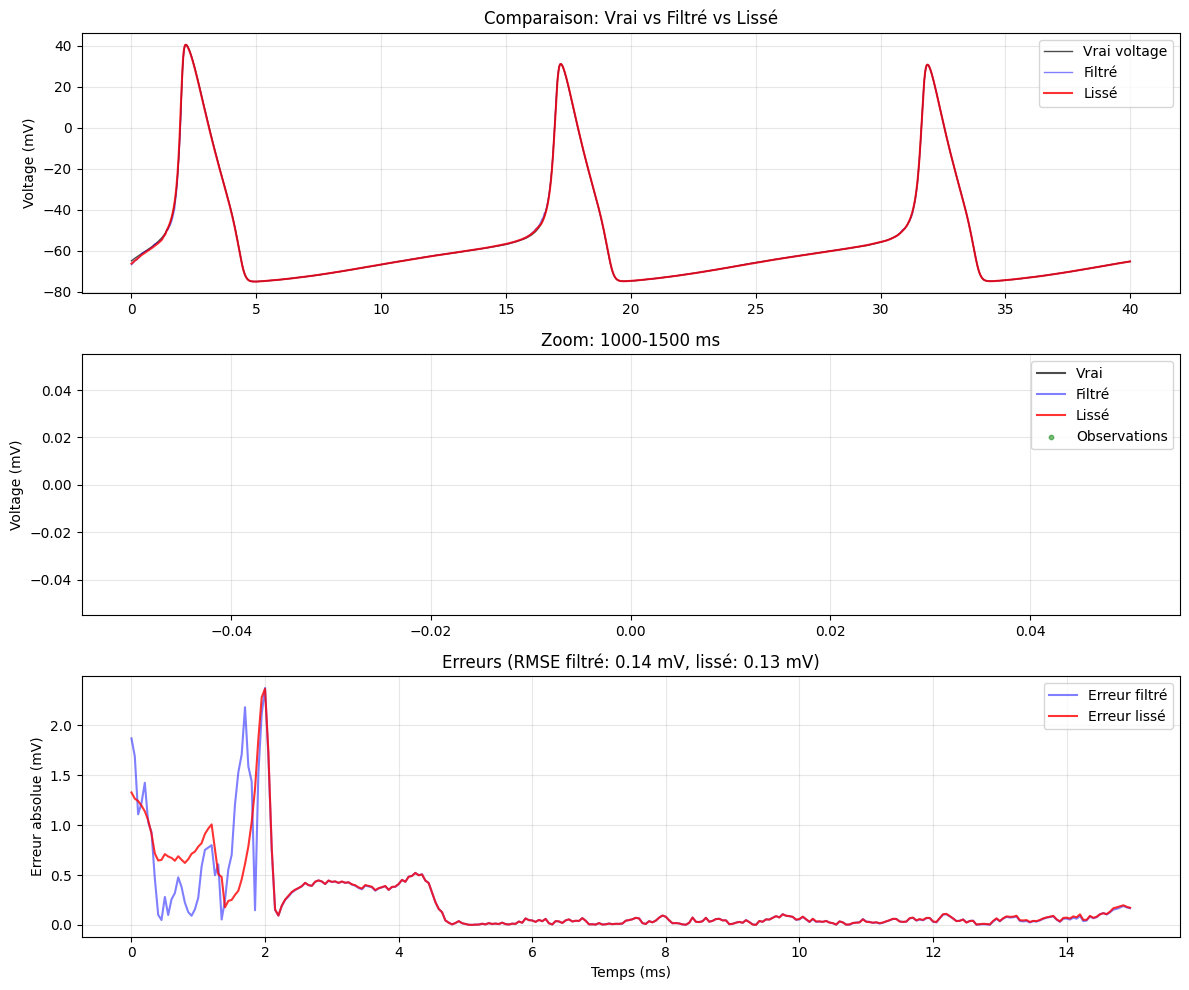

In [17]:
plot_smoothing_results(V_true, V_filt, V_smooth, V_obs, dt)

## EM algorithm

In [22]:
from em_algorithm import em_algorithm_hh, plot_em_convergence

In [18]:
n_iter = 3

initial_params = {
    "sigma_obs": 2,
    "sigma_dyn": 0.3,
    "I": 10.0,
    "gNa": 100.0,  # Intentionnellement différent des vraies valeurs
    "gK": 30.0,
    "gL": 0.35,
    "ENa": 55.0,
    "EK": -70.0,
    "EL": -54.4,
}

true_params = {
    "gNa": 120.0,
    "gK": 36.0,
    "gL": 0.3,
    "ENa": 50.0,
    "EK": -77.0,
    "EL": -54.4,
    "sigma_obs": 1.0,
    "sigma_dyn": 0.1,
}

In [20]:
params_final, history = em_algorithm_hh(
    y_obs=V_obs[:1000],
    dt=dt,
    n_iter=n_iter,
    N_particles=100,
    initial_params=initial_params,
)

ALGORITHME EM COMPLET POUR HODGKIN-HUXLEY
Itérations: 3, Particules: 100

ITERATION EM 1/3

🎯 E-STEP: Filtrage particulaire...
   ✓ Filtrage terminé (1.1s)
   Smoothing backward...
   ✓ Smoothing terminé (9.3s)

🎯 M-STEP: Estimation des paramètres...
   Estimation des variances de bruit...
   ✓ sigma_obs: 2.049 (précédent: 2.000)
   ✓ sigma_dyn: 0.025 (précédent: 0.300)
   Estimation des paramètres HH...
   🔍 Optimisation des paramètres HH...
   ✓ Optimisation réussie (141.7s)
   ✓ Estimation HH terminée (141.7s)
   ⚠  Impossible de calculer RMSE (fichier hh_data.npz manquant)

⏱️  Temps itération: 153.6s

📈 Évolution des paramètres HH:
   gNa: 100.00 → 121.63 (vrai: 120.00) → erreur:  16.7% →   1.4%
   gK:  30.00 →  36.90 (vrai:  36.00) → erreur:  16.7% →   2.5%
   gL:   0.35 →   0.15 (vrai:   0.30) ← erreur:  16.7% →  49.5%
   ENa:  55.00 →  49.81 (vrai:  50.00) → erreur:  10.0% →   0.4%
   EK: -70.00 → -76.72 (vrai: -77.00) → erreur:  -9.1% →  -0.4%
   EL: -54.40 → -45.23 (vrai: -54

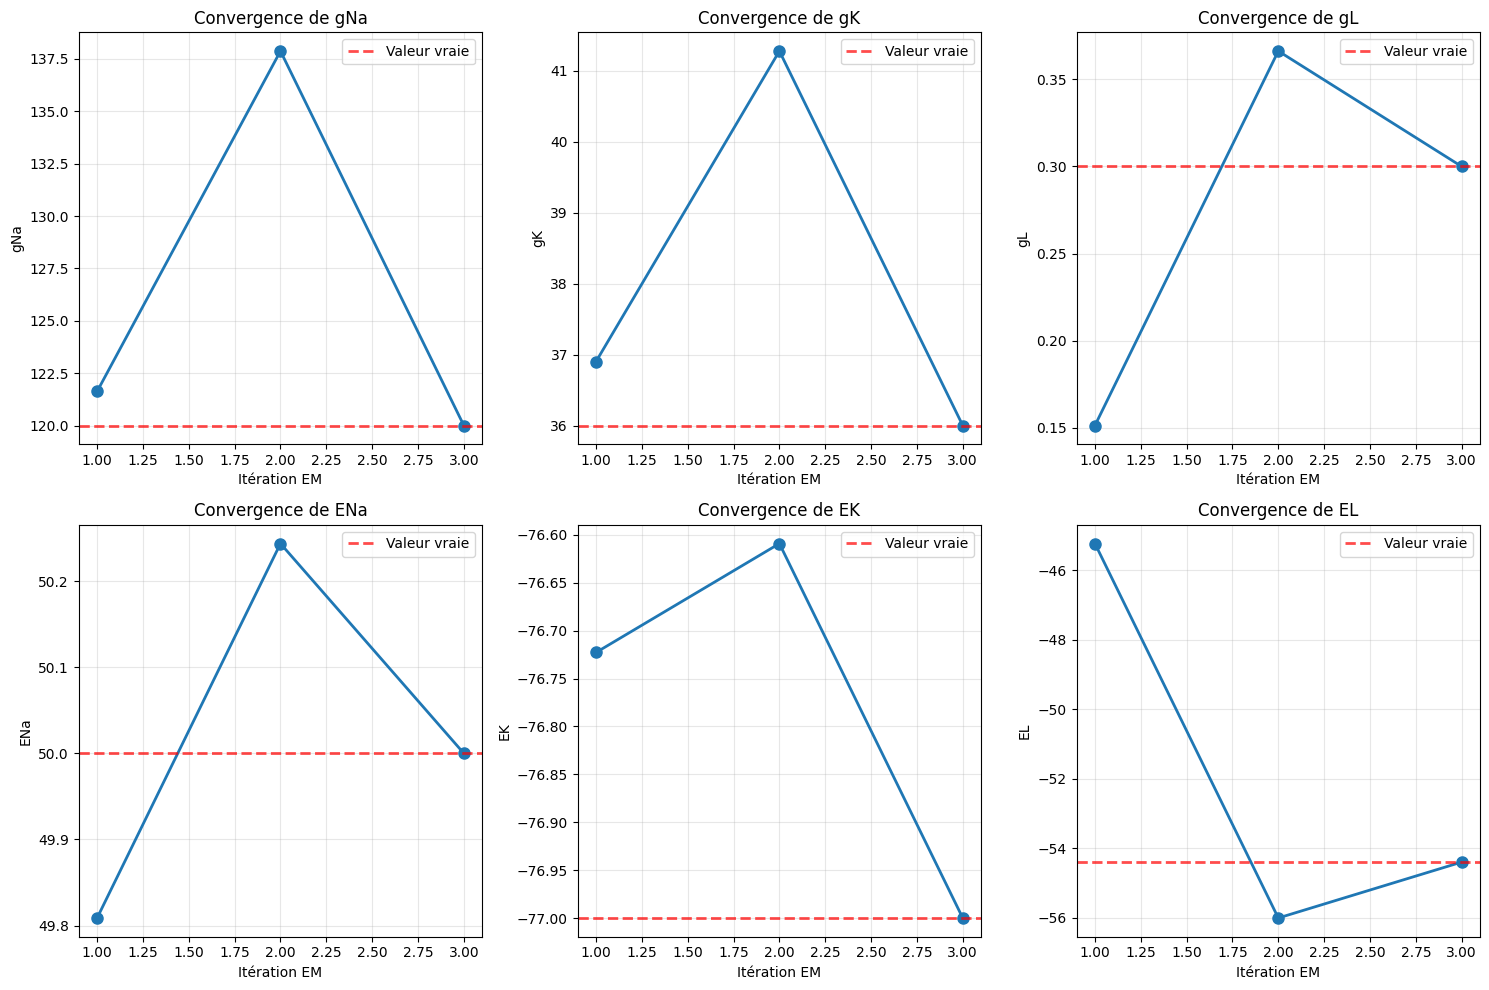

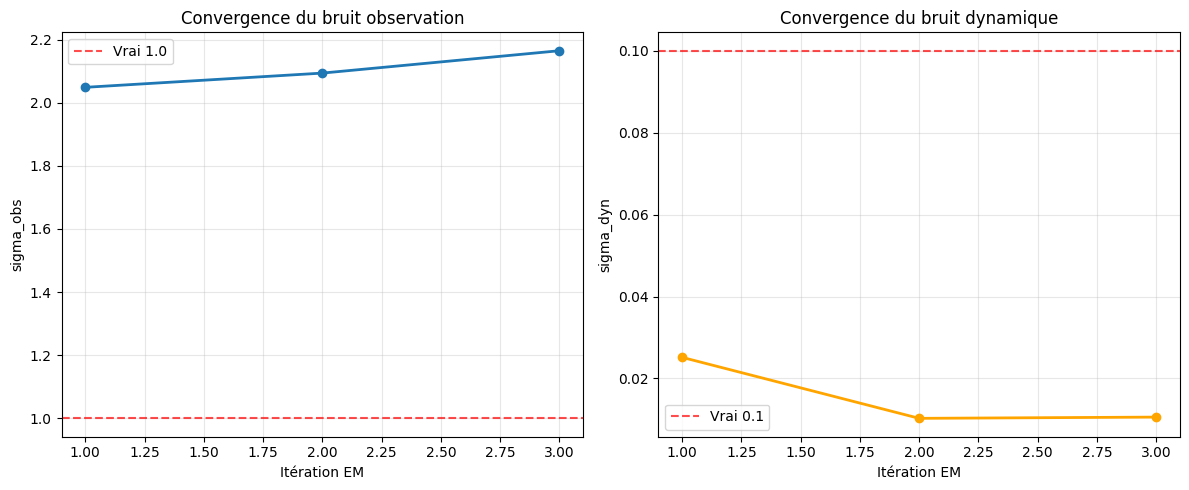

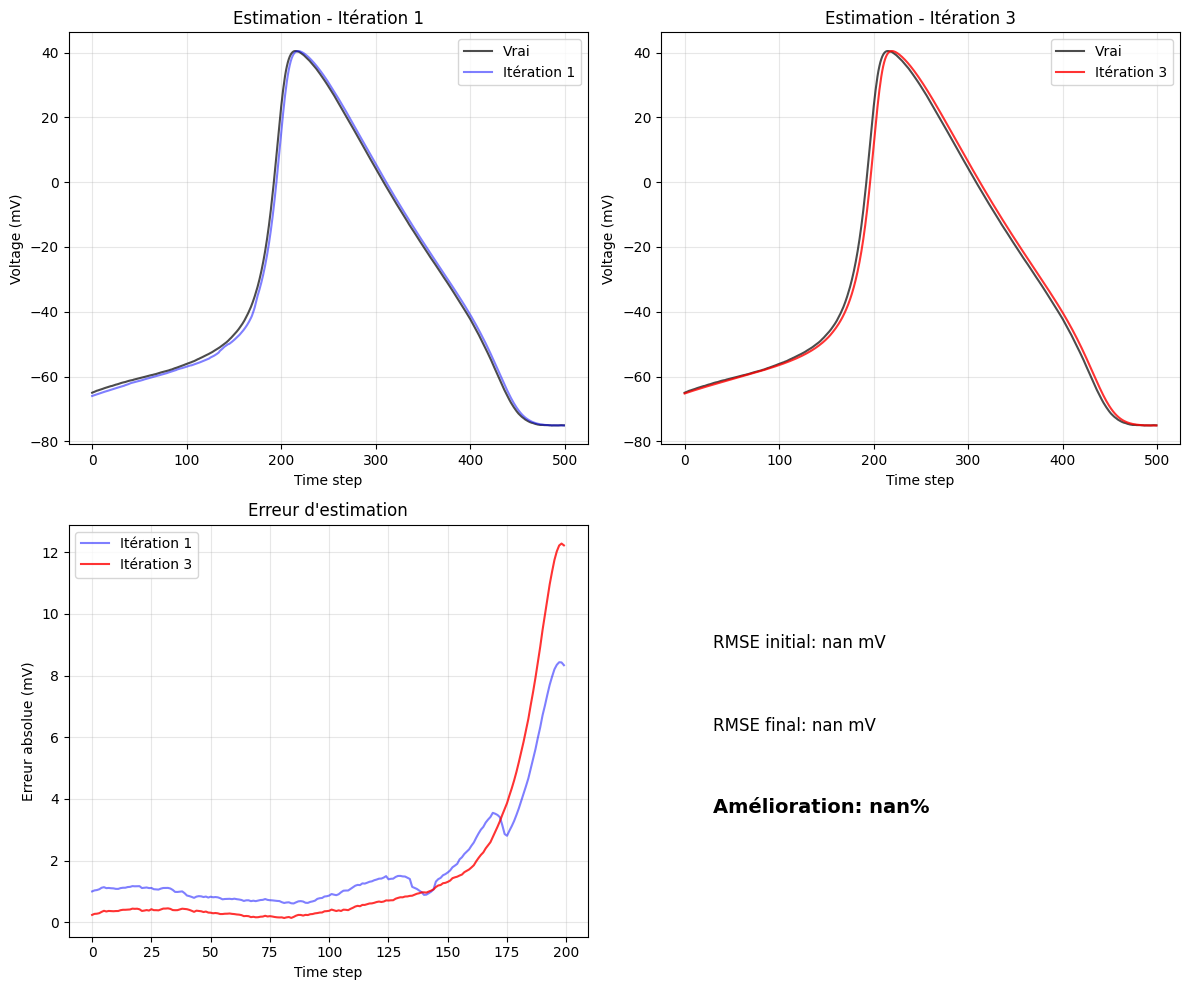

📈 Graphiques sauvegardés dans figures/em/


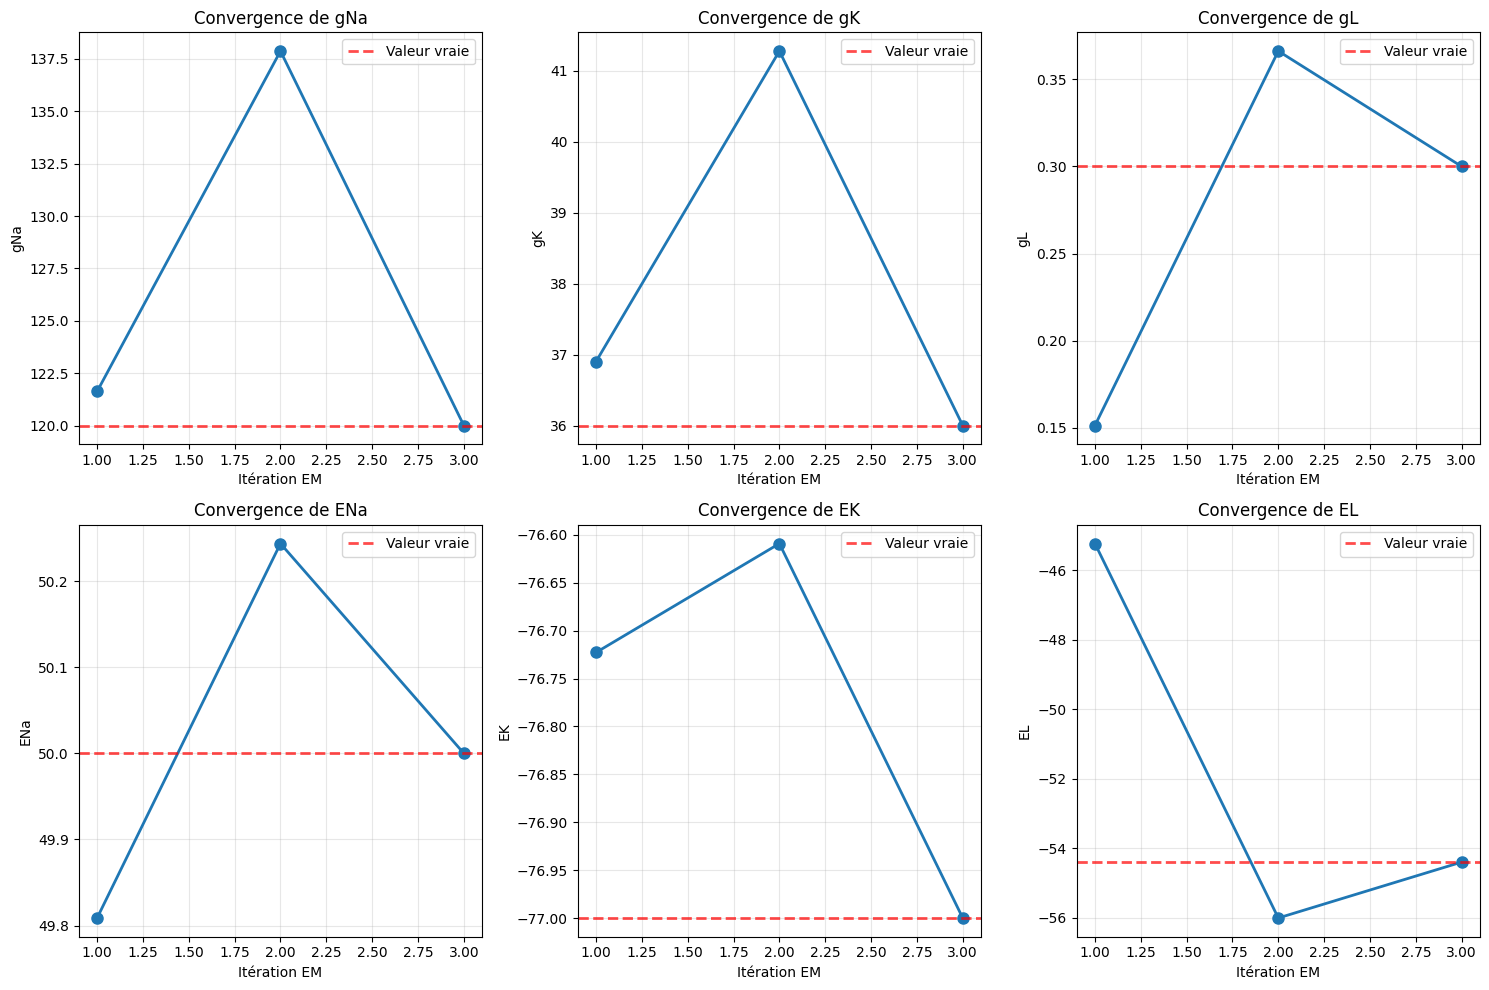

In [23]:
plot_em_convergence(history=history, true_params=true_params)
